In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('2017.csv')

In [3]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [4]:
df.shape[0]

156

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness.Rank                 156 non-null    int64  
 2   Happiness.Score                156 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       156 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [6]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     1
Whisker.low                      1
Economy..GDP.per.Capita.         0
Family                           1
Health..Life.Expectancy.         1
Freedom                          1
Generosity                       1
Trust..Government.Corruption.    1
Dystopia.Residual                1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [9]:
df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [10]:
df.drop(['Whisker.high','Whisker.low'],axis=1, inplace=True)

In [11]:
df

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


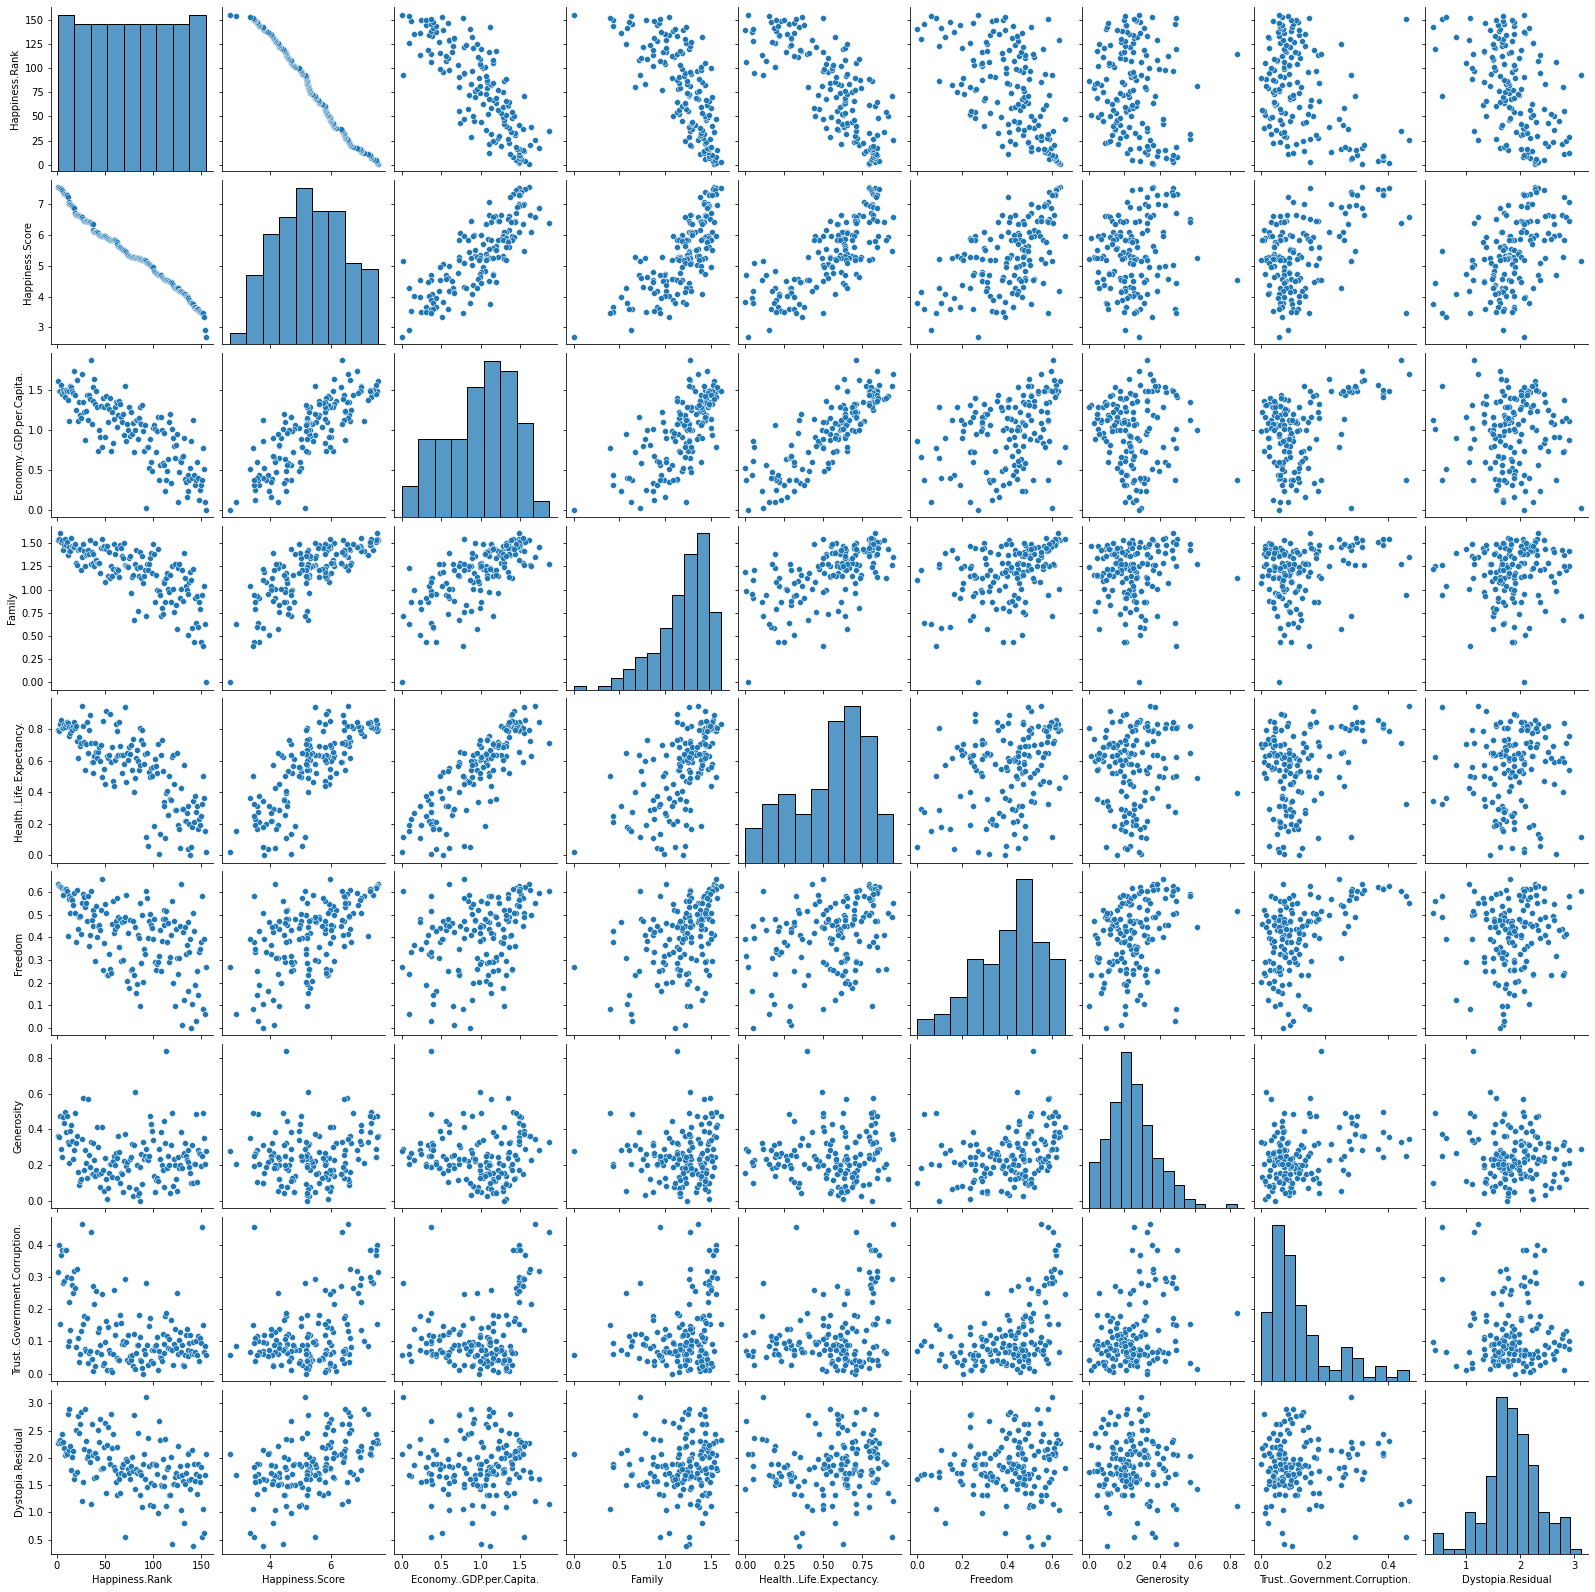

In [12]:
sns.pairplot(df)

<AxesSubplot:>

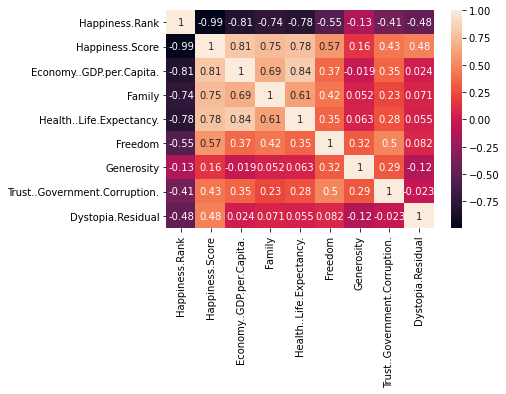

In [13]:
sns.heatmap(df.corr(),annot=True)

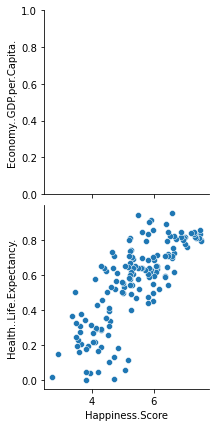

In [16]:
sns.pairplot(data=df, height=3, x_vars=['Happiness.Score'],y_vars=['Economy..GDP.per.Capita.','Health..Life.Expectancy.'])

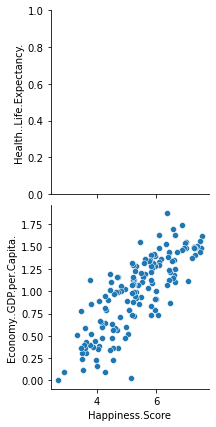

In [21]:
sns.pairplot(data=df, height=3, x_vars=['Happiness.Score'],y_vars=['Health..Life.Expectancy.','Economy..GDP.per.Capita.'])

In [23]:
df.corr(method='pearson',min_periods=20)['Happiness.Score'].abs().sort_values(ascending=False)

Happiness.Score                  1.000000
Happiness.Rank                   0.992774
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Name: Happiness.Score, dtype: float64

In [24]:
df['Happiness.Score'].describe()

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness.Score, dtype: float64

In [25]:
df['Economy..GDP.per.Capita.'].describe()

count    155.000000
mean       0.984718
std        0.420793
min        0.000000
25%        0.663371
50%        1.064578
75%        1.318027
max        1.870766
Name: Economy..GDP.per.Capita., dtype: float64

In [26]:
x = df.iloc[:,3:4].values

In [27]:
x

array([[1.61646318],
       [1.48238301],
       [1.48063302],
       [1.56497955],
       [1.44357193],
       [1.50394464],
       [1.47920442],
       [1.40570605],
       [1.49438727],
       [1.48441493],
       [1.37538242],
       [1.10970628],
       [1.48709726],
       [1.54625928],
       [1.53570664],
       [1.48792338],
       [1.46378076],
       [1.7419436 ],
       [1.44163394],
       [1.25278461],
       [1.62634337],
       [1.10735321],
       [1.35268235],
       [1.18529546],
       [1.15318382],
       [1.69227767],
       [1.34327984],
       [1.2175597 ],
       [0.87200195],
       [1.23374844],
       [1.43092346],
       [1.12786877],
       [1.43362653],
       [1.38439786],
       [1.87076569],
       [1.07062232],
       [1.53062356],
       [1.3613559 ],
       [1.63295245],
       [1.32539356],
       [1.48841226],
       [1.29121542],
       [0.7372992 ],
       [1.0008204 ],
       [0.9097845 ],
       [1.29178786],
       [0.78644109],
       [1.395

In [28]:
y = df.iloc[:,2:3].values

In [29]:
y

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599999],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.9710002 ],
       [5.964

In [30]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [34]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Happiness Score')

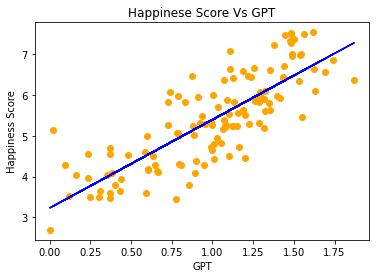

In [37]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title('Happinese Score Vs GPT')
plt.xlabel('GPT')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

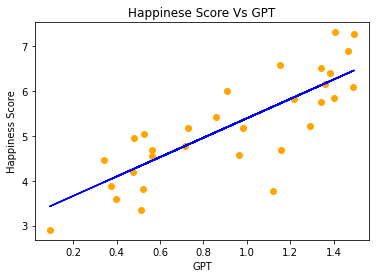

In [38]:
plt.scatter(x_test,y_test,color='orange')
plt.plot(x_test,regressor.predict(x_test), color='blue')
plt.title('Happinese Score Vs GPT')
plt.xlabel('GPT')
plt.ylabel('Happiness Score')